## Wine Classification

### Summary

In this project I built classification models for predicting wine classes applying various methods of feature selection. 

It is used the **Wine** dataset from <a href="https://archive.ics.uci.edu/dataset/109/wine">UCI</a>.

The project is done in Python. It uses Pandas and NumPy libraries for data manipulation, Matplotlib for visualizations, and 
sklearn for feature selection and building the classification models.

### Dataset Description

The Wine dataset contains 13 distinctive features describing the chemical properties of the 178 wine examples. The examples 
belong to one of three different classes, 1, 2, and 3 which refer to the three different types of grapes grown in the same 
region in Italy but derived from different wine cultivars. All attributes are continuous.

**Attribute information**
- Alcohol
- Malic acid
- Ash
- Alcalinity of ash  
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline    

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

### Load data

In [2]:
# Retrieve data in a pandas dataframe
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine = pd.read_csv(url,
        header=None)

# Get column names
wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                'Alcalinity of ash', 'Magnesium', 'Total phenols',
                 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                'Proline']

# Print the shape and the first rows
print(wine.shape, "\n")
print('Class labels', np.unique(wine['Class label']))
wine.head()

(178, 14) 

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Split the dataset in train and test data

In [3]:
# Create the label
label = "Class label"
# Create a dataframe for the label
y = wine[label]
# Create a list with all columns
cols = list(wine.columns)
# Remove Label from columns list
cols.remove(label)
# Create a dataframe without label
X = wine[cols]
# Print the shape of X and y
print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [4]:
# Split the dataset into training set and testing set
X_train, X_test, y_train, y_test =\
                    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0,
                     stratify=y)

# Print the shape of the training and testing datasets
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (124, 13)
y_train:  (124,)
X_test:  (54, 13)
y_test:  (54,)


### Scale features

In [5]:
# Scale features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### Correlation Statistics Method

**Feature selection** is the process of selecting a subset of features which are good predictors of the target. 

**Correlation Statistics** and **Mutual Information Statistics** techniques are part of the **filter methods**. Filter methods 
rank each feature based on some uni-variate metric and then selects the highest-ranking features. 

Next, we'll use the correlation statistics method for finding the most predictive features.

Sklearn library provides an implementation of the correlation statistic in the f_regression() function. 

We define the SelectKBest class to use the f_regression() function and select all the features, then transform the train and 
test sets and see how many top k most relevant features we should select. 

In [6]:
# Define a function for feature selection using all the features

def select_features(X_train, y_train, X_test):
    """Function for feature selection using all the features"""
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# Select the features
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

Next are printed the scores for each variable (larger is better). 

In [7]:
# Print the scores calculated for each input feature and the target variable
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 13.968436
Feature 1: 30.910616
Feature 2: 0.773105
Feature 3: 31.359399
Feature 4: 6.987836
Feature 5: 142.375295
Feature 6: 337.417368
Feature 7: 46.032649
Feature 8: 41.122449
Feature 9: 7.013232
Feature 10: 100.048523
Feature 11: 159.565213
Feature 12: 92.838547


Below it is plotted a bar chart of the **feature importance scores** for each input feature.

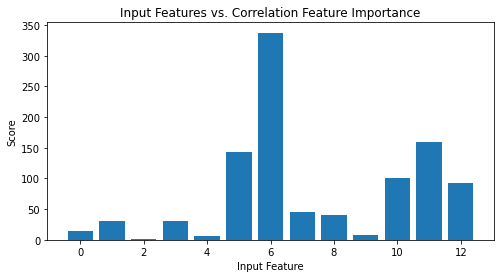

In [8]:
# Plot the scores
plt.gcf ().set_size_inches (8, 4)
plt.bar([i for i in range(len(fs.scores_))], 
        fs.scores_)
plt.title('Input Features vs. Correlation Feature Importance')
plt.xlabel('Input Feature')
plt.ylabel('Score')
plt.show()

The plot shows that aproximately **5 features** are a lot more important than the other features. 

The features selected by the correlation statistics method are: 

1. Total phenols
2. Flavanoids
3. Hue
4. OD280/OD315 of diluted wines
5. Proline

### Logistic Regression model using Correlation Features

We will set k=5 when configuring the SelectKBest to select these top features and build a logistic regression model.

In [9]:
# Use k=5 number of features

def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=5)            
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# Select the features
X_train_fs, X_test_fs, fs = \
    select_features(X_train_std,
                    y_train,
                    X_test_std)

# Fit the model
model = LogisticRegression(random_state=42)     
model.fit(X_train_fs, y_train)
# Evaluate the model
print('Training accuracy:', \
      model.score(X_train_fs, y_train))
print('Test accuracy:', \
      model.score(X_test_fs, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9444444444444444


It was used the accuracy score to evaluate the performance of the model on the feature subset.

Both training and test accuracies indicate that the model using only 5 features does a good job on both datasets.

### Forward Feature Selection

**Forward Feature Selection** and **Backward Feature Selection** are part of the **wrapper methods**. 

Backward feature selection uses recursive feature elimination (RFE) from sklean. 

Next, we'll use the forward feature selection method. The method starts with the evaluation of each individual feature, adding 
one feature in the model at each step based on the model performance until a feature subset of the desired size k is reached.

To perform the forward feature selection, it is used the Sequential Feature Selector (SFS) from mlxtend. 

Below are selected k=12 features from the dataset via SFS. After importing the function 
plotting.plot_sequential_feature_selection, we can also visualize the results using Matplotlib.

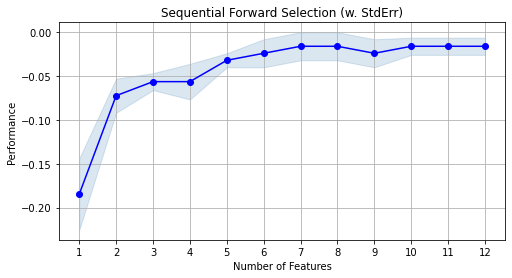

In [10]:
# build the model
model = LogisticRegression(random_state=42)     

# use SFS for feature selection
sfs = SFS(model, 
          k_features=12,                        
          forward=True,  
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs = sfs.fit(X_train_std, y_train)
# plot results of SFS
fig = plot_sfs(sfs.get_metric_dict(), 
               kind='std_err', 
               figsize=(8, 4))
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

The plot shows that the best model performance is for 5 features. The get_metric_dict() method shows which are the
5 features used for the best model performance.

In [12]:
# Get the 5 features for model
sfs.get_metric_dict()[5] 

{'feature_idx': (0, 4, 6, 10, 12),
 'cv_scores': array([-0.04, -0.04, -0.04, -0.04, -0.  ]),
 'avg_score': -0.032,
 'feature_names': ('0', '4', '6', '10', '12'),
 'ci_bound': 0.020564654692917912,
 'std_dev': 0.016,
 'std_err': 0.007999999999999998}

The features selected using the forward feature selection method are: 

1. Alcohol
2. Magnesium
3. Flavanoids
4. Hue
5. Proline

### Logistic Regression using Forward Selection Features

We'll create la dataframe with the 5 features identified using the Forward Selection Features.

In [13]:
# Create a list with the 5 features
selected_features = ['Alcohol', 'Magnesium', 
            'Flavanoids', 'Hue', 'Proline']

# Create a dataframe with selected features 
# by applying a mask
wine_Forward = wine[selected_features]
# Check the shape
wine_Forward.shape

(178, 5)

In [14]:
# Create an array with the values in the dataframe 
# with selected features
array = wine_Forward.values
# Make a numpy array
X_selected = array[:, 0:5]
# Check shape of X_selected
X_selected.shape

(178, 5)

In [15]:
# Split the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_selected, 
                            y, test_size=0.2, random_state=123)

# Scale features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [16]:
# Build the model
model = LogisticRegression(random_state=42)     # multi_class='multinomial' is the default
model.fit(X_train_std, y_train)
# Get model score
print('Training accuracy:', model.score(X_train_std, y_train))
print('Test accuracy:', model.score(X_test_std, y_test))

Training accuracy: 0.9859154929577465
Test accuracy: 1.0


Training and test accuracies have high values, using the 5 features selected by the sequential forward technique.

### L1 Regularization

**L1 and L2 regularization** techniques are part of the **embedded methods**. 

Embedded methods perform feature selection as a part of the model creation process. 

We can apply **L1 regularization** (Lasso) to encourage **sparsity in feature selection** or **L2 regularization** (Ridge) 
to **prevent overfitting**.

For L1 regularization, we set the penalty parameter to 'l1' to obtain a sparse solution and the solver to 'liblinear'.

The default value for C parameter is 1; smaller values specify stronger regularization. We'll build a model using C=0.1.

In [17]:
# Split the dataset into training set and testing set
X_train, X_test, y_train, y_test =\
                    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0,
                     stratify=y)

# Scale features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [18]:
# Select C=0.1

# Fit a logistic regression model
model = LogisticRegression(penalty='l1', 
                           solver='liblinear', 
                           C=0.1, 
                           random_state=42)
model.fit(X_train_std, 
          y_train)

# Determine training and test accuracy scores
print('Training accuracy:', 
      model.score(X_train_std, y_train))
print('Test accuracy:', 
      model.score(X_test_std, y_test))

Training accuracy: 0.9596774193548387
Test accuracy: 0.9814814814814815


In [19]:
# Intercept and coefficients
print("Intercept", "\n", model.intercept_)
print("\n")
print("Coefficients", "\n", model.coef_)

Intercept 
 [-0.31871907 -0.09903641 -0.81383908]


Coefficients 
 [[ 0.21949944  0.          0.          0.          0.          0.
   0.54254529  0.          0.          0.          0.          0.
   1.51466598]
 [-0.76604571 -0.04059071  0.          0.          0.          0.
   0.          0.          0.         -0.82388392  0.00706422  0.06470872
  -0.41591259]
 [ 0.          0.          0.          0.          0.          0.
  -0.7436765   0.          0.          0.42975784 -0.31939844 -0.51927735
   0.        ]]


Applied to the standardized wine dataset, the L1 regularized logistic regression yielded the sparse solution above.

We observe that the intercept array contains three values, corresponding to classes 1, 2 and 3.

The weight array contains three rows of weight coefficients, one weight vector for each class.

We could enforce sparsity by further increasing the regularization strength, by choosing lower values for the C parameter.

### L2 Regularization

L2 regularization is used to reduce complexity of a model by penalizing large individual weights.

The default value for C parameter is 1.
The penalty='l2' specifies L2 regularization, which helps reduce overfitting and solver remains as 'lbfgs'.

Below we'll build a model using C=0.01.

In [20]:
# C=0.01

# Fit a logistic regression model
model = LogisticRegression(penalty='l2', 
                           solver='lbfgs', 
                           C=0.01, 
                           random_state=42)     
model.fit(X_train_std, y_train)

# Determine training and test accuracy scores
print('Training accuracy:', \
      model.score(X_train_std,  y_train))
print('Test accuracy:', \
      model.score(X_test_std, y_test))

Training accuracy: 0.9758064516129032
Test accuracy: 0.9814814814814815


In [21]:
# Intercept and coefficients
print("Intercept", "\n", model.intercept_)
print("\n")
print("Coefficients", "\n", model.coef_)

Intercept 
 [-0.00358127  0.31788065 -0.31429938]


Coefficients 
 [[ 1.67464907e-01 -3.31954423e-02  6.56379249e-02 -1.27691033e-01
   6.95778772e-02  1.23921003e-01  1.47843191e-01 -7.35623698e-02
   6.41576427e-02  4.00573412e-02  8.08487556e-02  1.02084212e-01
   2.15757387e-01]
 [-2.09282642e-01 -7.34036860e-02 -9.74416926e-02  8.00227834e-02
  -8.00494476e-02 -2.10364298e-04  2.69053457e-02 -2.11335079e-02
   2.98282555e-02 -1.90216266e-01  8.15612069e-02  8.22568057e-02
  -1.81498497e-01]
 [ 4.18177353e-02  1.06599128e-01  3.18037676e-02  4.76682496e-02
   1.04715704e-02 -1.23710639e-01 -1.74748536e-01  9.46958778e-02
  -9.39858981e-02  1.50158925e-01 -1.62409962e-01 -1.84341018e-01
  -3.42588900e-02]]


Training and test accuracies have high values when using a C value of 0.01.

Smaller values for C parameter (ex C=0.001) lead to lower accuracy scores for both training and test datasets.

### Feature Importance with Random Forest

Another approach for selecting relevant features from a dataset is using random forest.

In sklearn we can access the feature importance values after fitting a RandomForestClassifier.

We'll train next a forest model of 500 trees and rank the 13 features by their respective importance measures.

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


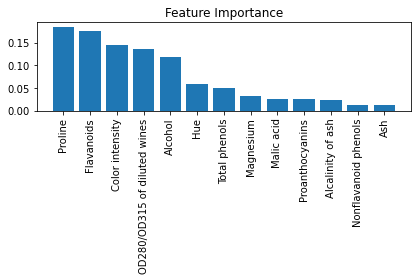

In [22]:
feat_labels = wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

The plot above shows the relative importance of the features in the wine dataset.

We can conclude that the **Proline** and **Flavonoid** levels, the **Color intensity**, the **OD280/OD315 diffraction**, and 
the **Alcohol** concentration of wine, are the most discriminative features in the dataset based on the average impurity 
decrease in the 500 decision trees.

We observe that two of the top-ranked features in the plot are also in the 5-features subset selection from correlation 
statistics and forward selection (**Proline** and **Flavanoids**).